Etapa 1: Importar bibliotecas necessárias
Este código é uma configuração para começar com redes neurais usando PyTorch e recursos de plotagem com matplotlib.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn

Etapa 2: Gerando dados sintéticos
Este código gera dados de séries temporais sintéticas sem anomalias, para testar algoritmos projetados para detectar se há padrões incomuns ou outliers.

Em comparação ao código do tutorial, esse não é inserido anomalias. Porém, mesmo assim aparecia no gráfico, então houve uma modificação no 'scale', diminuindo o valor. Isso geraria uma série temporal mais suave, com menos ruído, reduzindo a chance de detectar falsos positivos.

In [10]:
# Seed for reproducibility
np.random.seed(0)

# Generate synthetic time-series data
data_length = 300
data = np.sin(np.linspace(0, 20, data_length)) + np.random.normal(scale=0.1, size=data_length)

Etapa 3: Criando sequências
A função chamada create_sequencesque cria sequências sobrepostas a partir dos seus dados de séries temporais. Esta função é particularmente útil para preparar dados para modelos que exigem entrada de comprimento fixo, como muitos modelos de machine learning.

In [11]:
# Function to create sequences
def create_sequences(data, window_size):
    sequences = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i+window_size])
    return np.array(sequences)

window_size = 10
sequences = create_sequences(data, window_size)

Etapa 4: Definindo o modelo do Autoencoder
É criada uma classe Autoencoder usando PyTorch, que é um tipo de rede neural usada para tarefas de aprendizado não supervisionado, como redução de dimensionalidade ou detecção de anomalias neste caso.

In [14]:
# Define the Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(window_size, 5),
            nn.ReLU(),
            nn.Linear(5, 2),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(2, 5),
            nn.ReLU(),
            nn.Linear(5, window_size),
            nn.ReLU()
        )
        
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

model = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

Etapa 5: Convertendo sequências em sensores PyTorch
Para converter sequências em um tensor PyTorch, dtype=torch.float32é essencial especificar para usar as sequências com seu modelo PyTorch, pois as operações do PyTorch geralmente exigem que os dados estejam na forma de tensores.

In [15]:
# Convert sequences to PyTorch tensors
sequences = torch.tensor(sequences, dtype=torch.float32)

Etapa 6: Treinar o modelo
Este código é o loop de treinamento principal para um modelo de rede neural usando PyTorch

In [16]:
# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    optimizer.zero_grad()
    output = model(sequences)
    loss = criterion(output, sequences)
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}, Loss: {loss.item()}')

Epoch 10, Loss: 0.5512456297874451
Epoch 20, Loss: 0.5477439165115356
Epoch 30, Loss: 0.5447103977203369
Epoch 40, Loss: 0.5421042442321777
Epoch 50, Loss: 0.5398622155189514
Epoch 60, Loss: 0.5378932952880859
Epoch 70, Loss: 0.5362010598182678
Epoch 80, Loss: 0.534718930721283
Epoch 90, Loss: 0.5334386229515076
Epoch 100, Loss: 0.532340407371521


Etapa 7: Detecção de anomalias
O trecho de código realiza a detecção de anomalias usando um modelo treinado no PyTorch, avaliando os erros de reconstrução das sequências de entrada.

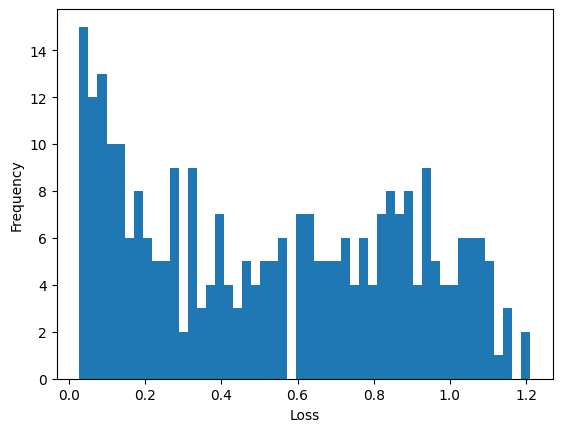

Anomaly threshold: 1.2329974174499512
Anomalies found at positions: []


In [17]:
# Anomaly detection (without actual anomalies)
with torch.no_grad():
    predictions = model(sequences)
    losses = torch.mean((predictions - sequences)**2, dim=1)
    plt.hist(losses.numpy(), bins=50)
    plt.xlabel("Loss")
    plt.ylabel("Frequency")
    plt.show()

# Threshold for defining an anomaly
threshold = losses.mean() + 2 * losses.std()
print(f"Anomaly threshold: {threshold.item()}")

# Detecting anomalies
anomalies = losses > threshold
anomaly_positions = np.where(anomalies.numpy())[0]
print(f"Anomalies found at positions: {np.where(anomalies.numpy())[0]}")

Etapa 8: Visualizando anomalias
As anomalias são visualizadas usando matplotlib.

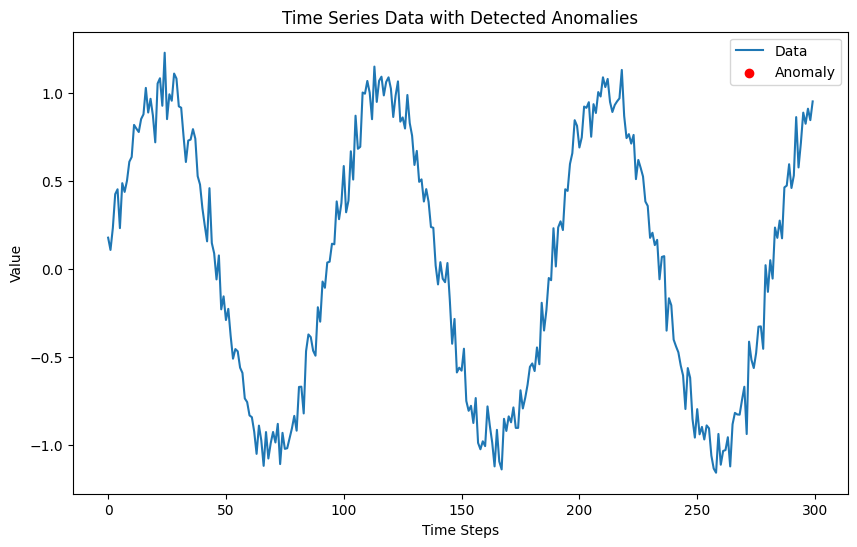

In [18]:
# Plotting anomalies on the time-series graph
plt.figure(figsize=(10, 6))
plt.plot(data, label='Data')
plt.scatter(anomaly_positions, data[anomaly_positions], color='r', label='Anomaly')
plt.title("Time Series Data with Detected Anomalies")
plt.xlabel("Time Steps")
plt.ylabel("Value")
plt.legend()
plt.show()